# DFT von Signalen in Abhängigkeit von Abtastfrequenz und Signallänge
Zeichnet ein Signal mit einstellbarer Signalfrequenz und Abtastrate und berechnet per DFT das Spektrum. Das Zeitfenster für die DFT kann verändert werden.
Beobachten Sie die Auswirkungen:
- Verändern Sie die Fensterlänge
- Verändern Sie Abtastrate und/oder Abtastfrequenz
- Verändern Sie die Signalfrequenz
- Wann bekommen Sie "saubere" Peaks im Spektrum? Wann "laufen die Peaks aus" (Leckeffekt)? 

Hinweis: Wenn Sie einen Slider anclicken, können Sie die Pfeiltasten zum Verschieben benutzen

Output()

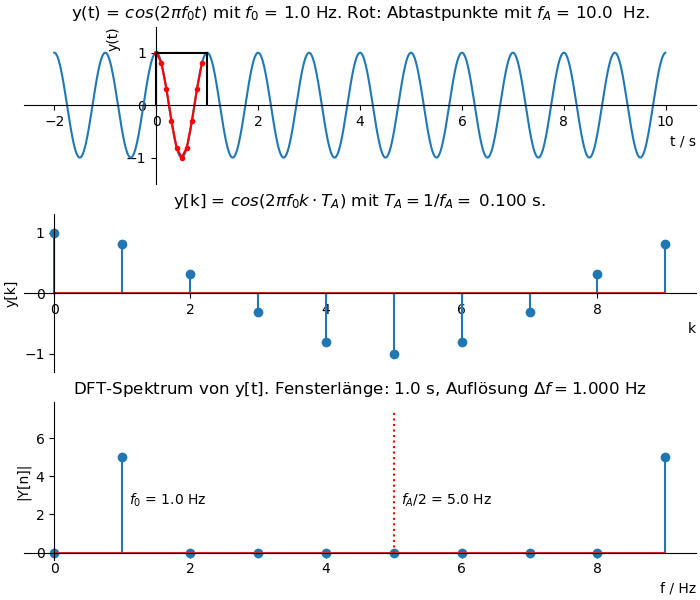

In [6]:
"""
DFT-Demoscript (Matlab-Style)

(c) Benno Dömer | HS Pforzheim 2022 

"""
%matplotlib widget 

from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, linspace, zeros, ones) # numpy für's Rechnen, bei Bedarf anpassen
from numpy.fft import fft
from matplotlib.pyplot import (figure, plot, stem, legend, text,  
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
from matplotlib.pyplot import fill_between as area # Beispiel für eine Mapping auf Matlab-Bezeichnung
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

figure(figsize=(7, 6), dpi=100, layout='constrained',num=' ') 

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    
def plotdata(fa,tl,f0,xax):

    ax1=subplot(3,1,1)
    cla()
    nw = round(fa * tl);
    print(f"Fensterlänge: {nw*1/fa:.1f} s, N= {nw} Werte")
    tc = arange(-2,10,0.01); # Zeitachste für Darstellung "kontiniuierliches" Signal
    yc = cos(2*pi*f0*tc); # "kontiniuierliches" Signal 

    t = arange(0,10,1/fa); # Abtastzeitpunkte
    y = cos(2*pi*f0*t); # abgetastetes Signal

    plot(tc,yc,#  Kontinuierliches Signal
         t[0:nw],y[0:nw],'.-r', # Abtastpunkte im Signalausschnitt
         [0, 0, nw*1/fa, nw*1/fa],[0, 1, 1, 0],'k') # Fenster
    xlabel('t / s',loc='right')
    ylabel('y(t)',loc='top')
    title(r'y(t) = $cos(2\pi f_0 t)$ mit $f_0$ = ' f'{f0:.1f} Hz. Rot: Abtastpunkte mit $f_A$ = {fa:.1f}  Hz.')
    ylim(-1.5,1.5)
    myplotstyle(ax1)

    ax2=subplot(3,1,2)
    cla()
    stem(arange(0,nw,1),y[0:nw]) # y[k]; X-Achse um 1 korrigiert wg. Zählung ab k=0
    xlabel('k',loc='right')
    ylabel('y[k]')
    title(r'y[k] = $cos(2\pi f_0 k\cdot T_A)$ mit $T_A = 1/f_A =$' +f' {1/fa:.3f} s.')
    ylim(-1.3,1.3)
    myplotstyle(ax2)
    
    ax3=subplot(3,1,3)
    cla()
    Y = fft(y,nw);
    if xax:
        stem(arange(0,nw)*fa/nw,abs(Y)) # Y[k]; X-Achse um 1 korrigiert wg. Zählung ab n=0    
        plot([fa/2,fa/2],[0, 3*nw/4],':r')
        ax3.text(f0+.1, nw/4, f'$f_0$ = {f0:.1f} Hz')
        ax3.text(fa/2+.1, nw/4,f'$f_A/2$ = {fa/2:.1f} Hz')
        xlabel('f / Hz',loc='right')
    else:
        stem(arange(0,nw),abs(Y)) # Y[k]; X-Achse um 1 korrigiert wg. Zählung ab n=0    
        xlabel('n',loc='right')
    ylabel('|Y[n]|')
    myplotstyle(ax3)

    title(f'DFT-Spektrum von y[t]. Fensterlänge: {nw/fa:.1f} s, Auflösung $\Delta f= ${fa/nw:.3f} Hz')
    #set(gcf,'Position',[0,0,700,150])
    
## Interaktion: 
# Definition von Controls: 
faslider  = widgets.FloatSlider(min=1, max=50, step=1, value=10, continuous_update=True, description='$f_A$')
tlslider  = widgets.FloatSlider(min=1, max=10, step=0.1, value=1, continuous_update=True, description='$t_l$')
f0slider  = widgets.FloatSlider(min=.5, max=10, step=.1, value=1, continuous_update=True, description='$f_0$')
axcombo = widgets.Dropdown(options=[('Frequenz',True),('Stützstellen (n)',False)],
                                    value=True,description='x-Achse')

# Arrangieren hier in horizontale Box:
ui1 = widgets.HBox([faslider, tlslider])
ui2 = widgets.HBox([f0slider, axcombo])
                                    

#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, { 'fa': faslider,'tl': tlslider,'f0':f0slider,'xax':axcombo}) 
#Anzeigen
display(ui1,ui2,out)

